In [73]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('matchups_10.csv')
df = df[df['round'] != 'First Round']
print(df.shape)
df.head()

(279, 87)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,wab,prpg!,...,D_B,D_C,D_D,D_F,F_S,F_A,F_B,F_C,F_D,F_F
1,2015,Midwest,Second Round,1,2015 Kentucky,8,2015 Cincinnati,1,14.1214,-3.5000,...,0,0,0,0,0,0,0,0,0,0
2,2015,Midwest,Sweet 16,1,2015 Kentucky,5,2015 West Virginia,1,9.0103,-0.6000,...,0,0,0,0,0,0,0,0,0,0
3,2015,Midwest,Elite Eight,1,2015 Kentucky,3,2015 Notre Dame,1,4.5163,-3.2000,...,0,0,0,0,0,0,0,0,0,0
4,2015,Midwest,Second Round,6,2015 Butler,3,2015 Notre Dame,0,-5.0824,-3.8000,...,0,0,0,0,0,0,0,0,0,0
5,2015,Final Four,Final Four,1,2015 Kentucky,1,2015 Wisconsin,0,1.7004,-7.2000,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df['win'].value_counts(normalize=True)

1   0.5197
0   0.4803
Name: win, dtype: float64

In [75]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team',
       'low_bracket_seed', 'low_bracket_team', 'win', 'wab', 'prpg!', 'dprpg',
       'bpm', 'obpm', 'dbpm', 'bpr', 'obpr', 'dbpr', 'kenpom_adjem',
       'kenpom_adjoe', 'kenpom_adjde', 'barthag', 'barthag_oe', 'barthag_de',
       'off_eff', 'def_eff', 'efg%', 'ftr', 'tor', 'orb%', 'efgd%', 'ftrd',
       'tord', 'drb%', '2p%', '3p%', 'blked%', 'ast%', '3pr', 'ft%', '2p%d',
       '3p%d', 'blk%', 'ast%d', '3prd', 'ft%d', 'height', 'size', 'experience',
       'bench', 'high_tier', 'low_tier', 'S_S', 'S_A', 'S_B', 'S_C', 'S_D',
       'S_F', 'A_S', 'A_A', 'A_B', 'A_C', 'A_D', 'A_F', 'B_S', 'B_A', 'B_B',
       'B_C', 'B_D', 'B_F', 'C_S', 'C_A', 'C_B', 'C_C', 'C_D', 'C_F', 'D_S',
       'D_A', 'D_B', 'D_C', 'D_D', 'D_F', 'F_S', 'F_A', 'F_B', 'F_C', 'F_D',
       'F_F'],
      dtype='object')

In [76]:
eda_df = df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench', 
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

In [77]:
# Split dataset into a train and test set
X = eda_df.iloc[:,1:]
Y = eda_df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(195, 78)
(84, 78)


In [78]:
train_cat = train_df[[
    'win',
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

train_num = train_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench']]

### I. Categorical Variables

In [79]:
s_tiers = train_cat[[
 'S_S',
 'S_A',
 'S_B',
 'S_C',
 'S_D',
 'S_F']]
print(s_tiers.value_counts())
a_tiers = train_cat[[
 'A_S',
 'A_A',
 'A_B',
 'A_C',
 'A_D',
 'A_F']]
print(a_tiers.value_counts())
b_tiers = train_cat[[
 'B_S',
 'B_A',
 'B_B',
 'B_C',
 'B_D',
 'B_F']]
print(b_tiers.value_counts())
c_tiers = train_cat[[
 'C_S',
 'C_A',
 'C_B',
 'C_C',
 'C_D',
 'C_F']]
print(c_tiers.value_counts())
d_tiers = train_cat[[
 'D_S',
 'D_A',
 'D_B',
 'D_C',
 'D_D',
 'D_F']]
print(d_tiers.value_counts())
f_tiers = train_cat[[
 'F_S',
 'F_A',
 'F_B',
 'F_C',
 'F_D',
 'F_F']]
print(f_tiers.value_counts())

S_S  S_A  S_B  S_C  S_D  S_F
0    0    0    0    0    0      139
               1    0    0       20
     1    0    0    0    0       16
     0    1    0    0    0       11
1    0    0    0    0    0        8
0    0    0    0    1    0        1
dtype: int64
A_S  A_A  A_B  A_C  A_D  A_F
0    0    0    0    0    0      153
     1    0    0    0    0       15
1    0    0    0    0    0       11
0    0    1    0    0    0        9
          0    1    0    0        4
               0    1    0        2
                    0    1        1
dtype: int64
B_S  B_A  B_B  B_C  B_D  B_F
0    0    0    0    0    0      161
     1    0    0    0    0       16
     0    0    1    0    0        5
          1    0    0    0        4
          0    0    0    1        3
                    1    0        3
1    0    0    0    0    0        3
dtype: int64
C_S  C_A  C_B  C_C  C_D  C_F
0    0    0    0    0    0      140
     1    0    0    0    0       20
     0    1    0    0    0       14
1    0    0    0 

In [80]:
# Remove all tier matchups that happened five or less times and view win percentage of the the remaining tiers
all_tiers = train_cat[[
'win',
'S_S',
'S_A',
'S_B',
'S_C',
'A_S',
'A_A',
'A_B',
'B_A',
'B_C',
'C_S',
'C_A',
'C_B']]

In [81]:
all_tiers.groupby(by=['win', 'S_A']).size()

win  S_A
0    0      90
     1       4
1    0      89
     1      12
dtype: int64

In [82]:
all_tiers.groupby(by=['win', 'S_B']).size()

win  S_B
0    0      91
     1       3
1    0      93
     1       8
dtype: int64

In [83]:
all_tiers.groupby(by=['win', 'S_C']).size()

win  S_C
0    0      92
     1       2
1    0      83
     1      18
dtype: int64

In [84]:
all_tiers.groupby(by=['win', 'A_S']).size()

win  A_S
0    0      85
     1       9
1    0      99
     1       2
dtype: int64

In [85]:
all_tiers.groupby(by=['win', 'A_B']).size()

win  A_B
0    0      91
     1       3
1    0      95
     1       6
dtype: int64

In [86]:
all_tiers.groupby(by=['win', 'B_A']).size()

win  B_A
0    0      82
     1      12
1    0      97
     1       4
dtype: int64

In [87]:
all_tiers.groupby(by=['win', 'B_C']).size()

win  B_C
0    0      91
     1       3
1    0      99
     1       2
dtype: int64

In [88]:
all_tiers.groupby(by=['win', 'C_S']).size()

win  C_S
0    0      87
     1       7
1    0      99
     1       2
dtype: int64

In [89]:
all_tiers.groupby(by=['win', 'C_A']).size()

win  C_A
0    0      77
     1      17
1    0      98
     1       3
dtype: int64

In [90]:
all_tiers.groupby(by=['win', 'C_B']).size()

win  C_B
0    0      87
     1       7
1    0      94
     1       7
dtype: int64

### II. Numerical Tests

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_85881/3841579261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])


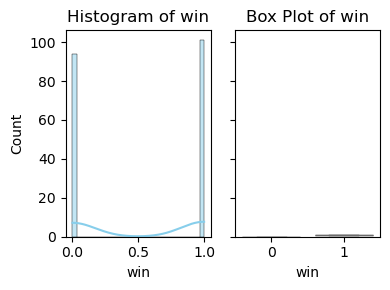

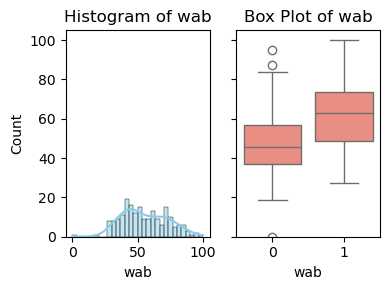

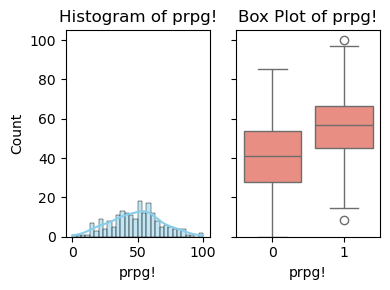

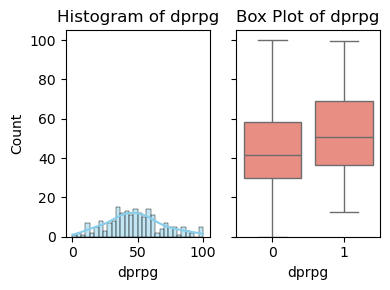

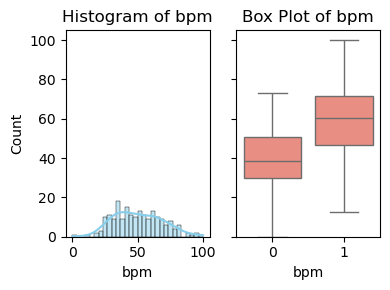

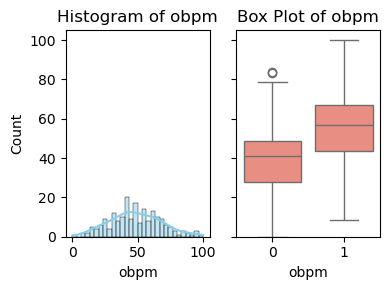

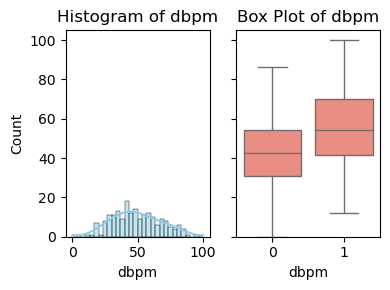

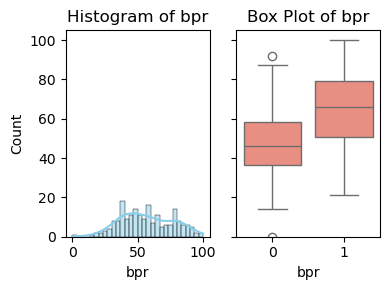

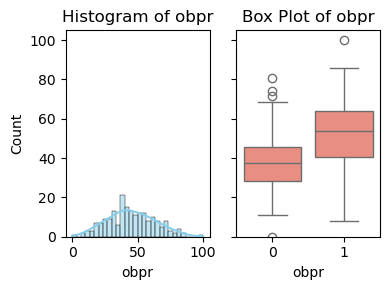

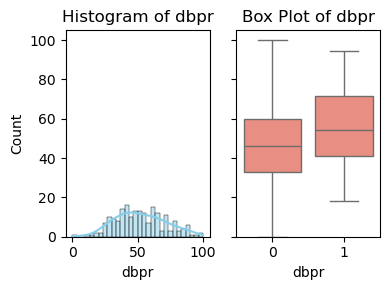

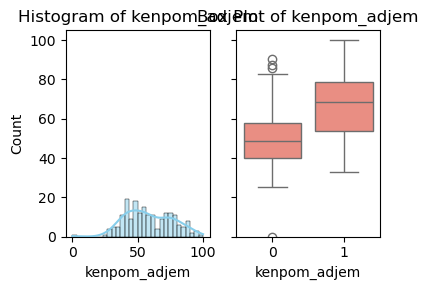

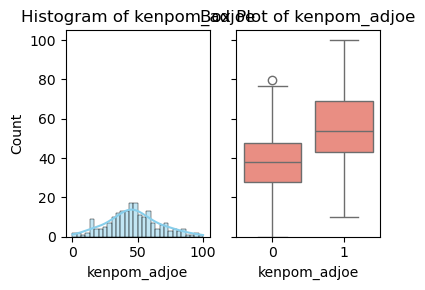

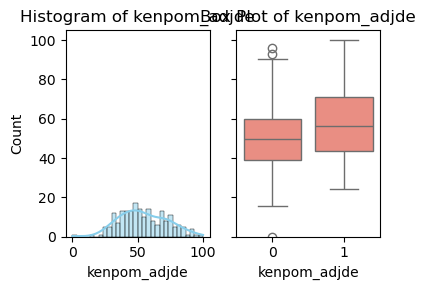

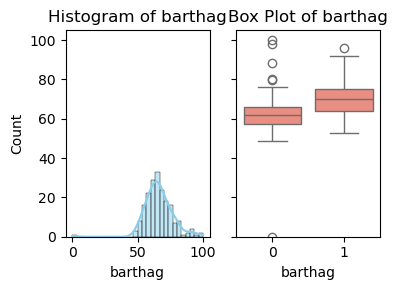

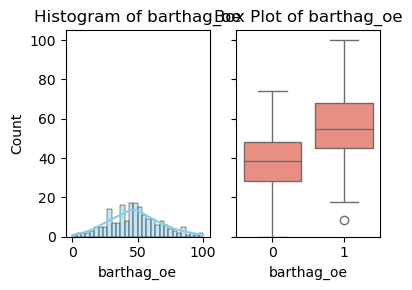

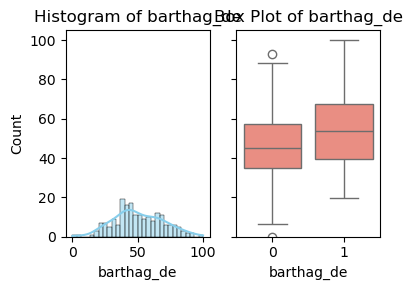

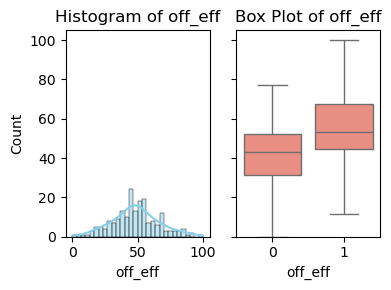

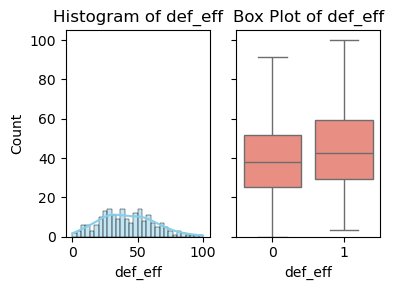

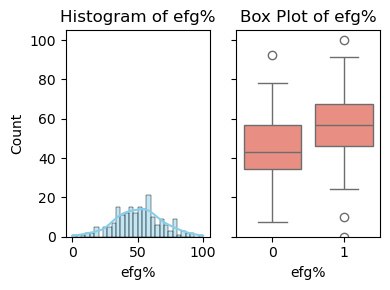

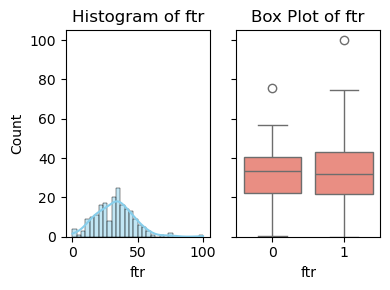

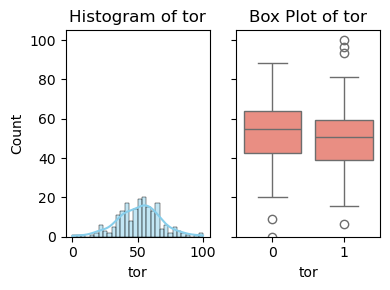

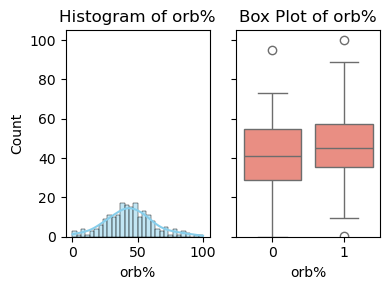

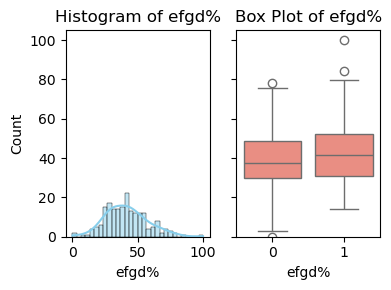

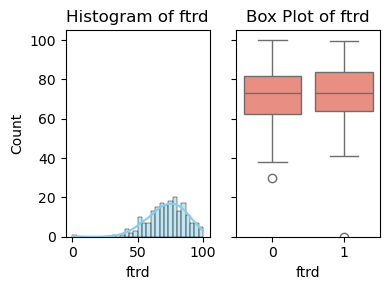

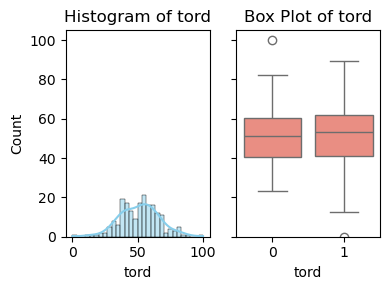

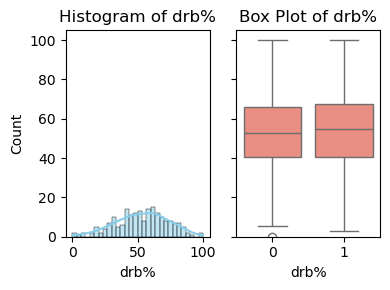

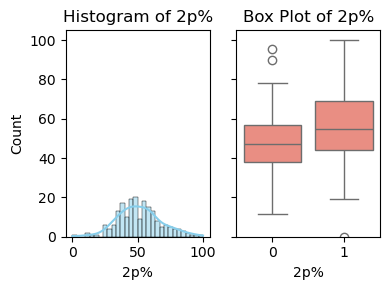

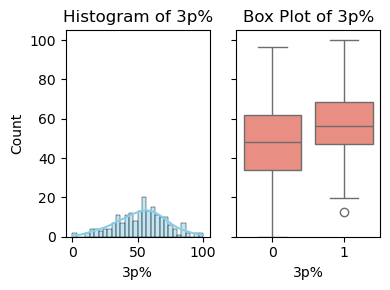

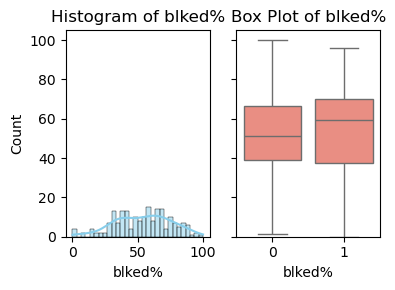

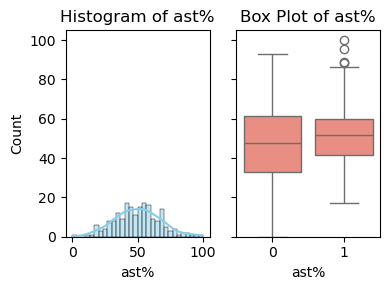

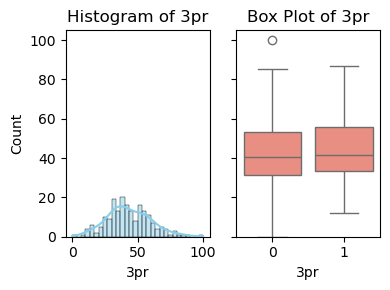

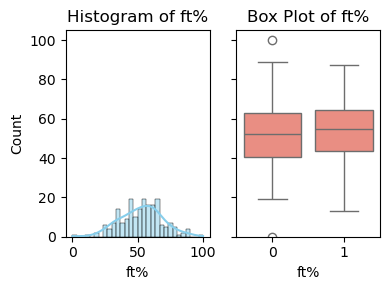

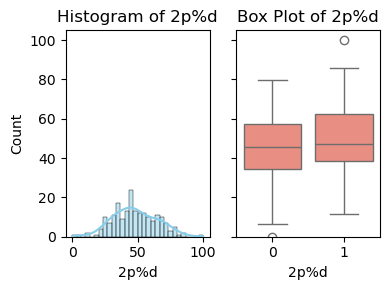

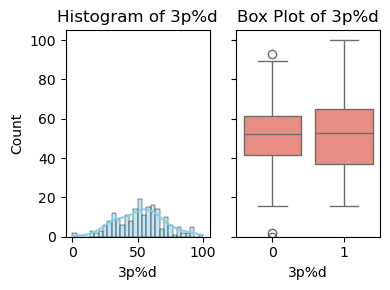

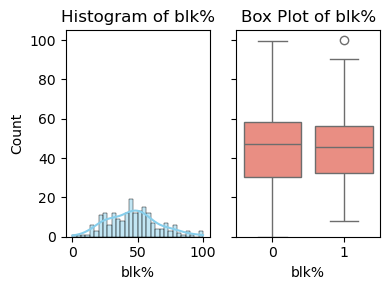

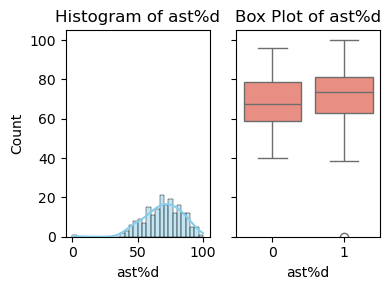

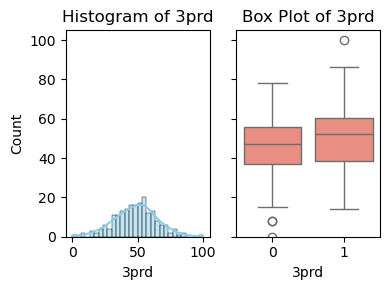

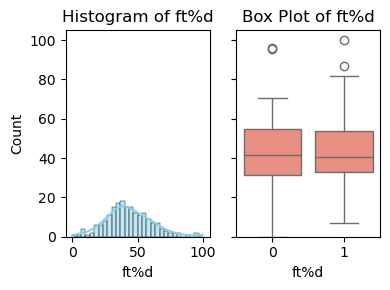

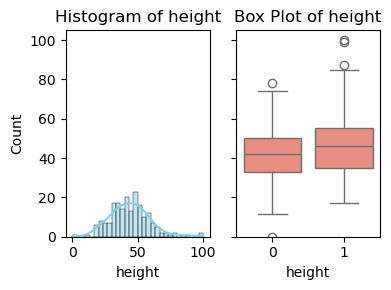

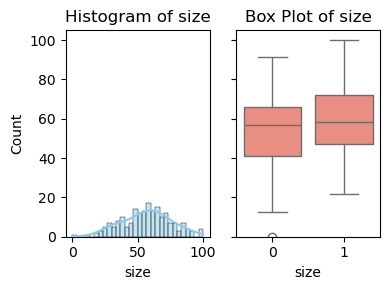

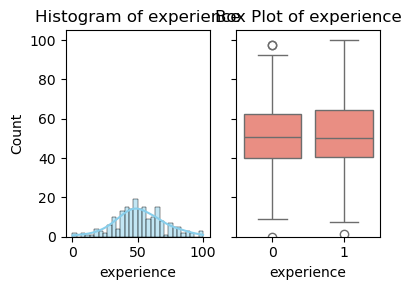

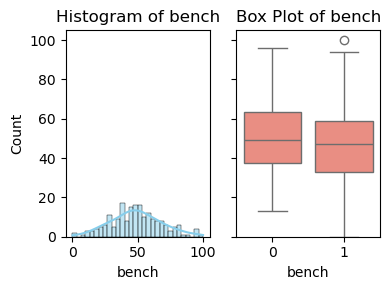

In [91]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_num
numeric_columns = train_num.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

In [92]:
corr_matrix = train_num.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 10]
print(correlation_with_target)

win            100.0000
wab             40.8900
prpg!           38.7300
dprpg           23.7700
bpm             48.4000
obpm            41.2500
dbpm            31.3000
bpr             42.8400
obpr            42.3100
dbpr            24.1400
kenpom_adjem    45.4300
kenpom_adjoe    43.4100
kenpom_adjde    19.1400
barthag         38.0800
barthag_oe      45.1100
barthag_de      21.0300
off_eff         37.9800
def_eff         12.6700
efg%            31.6200
orb%            15.9400
efgd%           13.1200
2p%             23.7600
3p%             27.5400
ast%            15.6100
2p%d            11.9500
3prd            18.1000
height          13.9600
size            13.4500
bench           10.3500
Name: win, dtype: float64


In [93]:
X = train_num.drop('win', axis=1)
y = train_num['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,wab,38.7424,0.0000,0.0902
1,prpg!,34.0653,0.0000,0.0282
2,dprpg,11.5588,0.0008,0.1147
3,bpm,59.0571,0.0000,0.1418
4,obpm,39.5774,0.0000,0.1599
5,dbpm,20.9675,0.0000,0.0154
6,bpr,43.3738,0.0000,0.0708
7,obpr,42.0826,0.0000,0.0647
8,dbpr,11.9447,0.0007,0.0750
9,kenpom_adjem,50.2028,0.0000,0.0579


In [94]:
stats_df[stats_df['mutual_info'] > .05]

,feature,f_values,p_values,mutual_info
0,wab,38.7424,0.0000,0.0902
2,dprpg,11.5588,0.0008,0.1147
3,bpm,59.0571,0.0000,0.1418
4,obpm,39.5774,0.0000,0.1599
6,bpr,43.3738,0.0000,0.0708
7,obpr,42.0826,0.0000,0.0647
8,dbpr,11.9447,0.0007,0.0750
9,kenpom_adjem,50.2028,0.0000,0.0579
10,kenpom_adjoe,44.8210,0.0000,0.1381
12,barthag,32.7329,0.0000,0.0734


In [95]:
stats_df[stats_df['p_values'] < .05]

,feature,f_values,p_values,mutual_info
0,wab,38.7424,0.0000,0.0902
1,prpg!,34.0653,0.0000,0.0282
2,dprpg,11.5588,0.0008,0.1147
3,bpm,59.0571,0.0000,0.1418
4,obpm,39.5774,0.0000,0.1599
5,dbpm,20.9675,0.0000,0.0154
6,bpr,43.3738,0.0000,0.0708
7,obpr,42.0826,0.0000,0.0647
8,dbpr,11.9447,0.0007,0.0750
9,kenpom_adjem,50.2028,0.0000,0.0579


In [96]:
stats_df[stats_df['f_values'] > 5]

,feature,f_values,p_values,mutual_info
0,wab,38.7424,0.0000,0.0902
1,prpg!,34.0653,0.0000,0.0282
2,dprpg,11.5588,0.0008,0.1147
3,bpm,59.0571,0.0000,0.1418
4,obpm,39.5774,0.0000,0.1599
5,dbpm,20.9675,0.0000,0.0154
6,bpr,43.3738,0.0000,0.0708
7,obpr,42.0826,0.0000,0.0647
8,dbpr,11.9447,0.0007,0.0750
9,kenpom_adjem,50.2028,0.0000,0.0579


In [97]:
# Remove any numerical variables who hit 0 criteria
# Remove any categorical variables who's win percentage is less than Round 1 win percentage
train_df = train_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'efg%',
    'orb%', 
    '2p%', 
    '3p%', 
    'ast%', 
    '3prd', 
    'S_A',
    'S_B',
    'S_C',
    'A_S',
    'A_B',
    'B_A',
    'C_S',
    'C_A']]

test_df = test_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'efg%',
    'orb%', 
    '2p%', 
    '3p%', 
    'ast%', 
    '3prd', 
    'S_A',
    'S_B',
    'S_C',
    'A_S',
    'A_B',
    'B_A',
    'C_S',
    'C_A']]

### III. Wrapper Methods

In [98]:
X_train = train_df.iloc[:,1:]
Y_train = train_df['win']

X_test = test_df.iloc[:,1:]
Y_test = test_df['win']

float64_columns = X_train.select_dtypes(include=['float64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[float64_columns] = scaler.fit_transform(X_train[float64_columns])

X_test_scaled = X_test.copy()
X_test_scaled[float64_columns] = scaler.transform(X_test[float64_columns])

In [99]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [100]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 30
selected features: 11
features with coefficients shrank to zero: 19


In [101]:
selected_feat

Index(['prpg!', 'bpm', 'obpm', 'barthag_oe', 'barthag_de', '2p%', '3p%',
       'ast%', '3prd', 'A_S', 'C_A'],
      dtype='object')

In [102]:
# Transform datasets based on selected features
X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)

# Train a Lasso regression model
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = lasso.predict(X_train_selected)
y_test_pred = lasso.predict(X_test_selected)

# Convert predictions to binary using a threshold
threshold = 0.5
y_train_pred_binary = (y_train_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Evaluate F1 scores
f1_train = f1_score(y_train, y_train_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)

print(f"Lasso Regression F1 Score (Train): {f1_train:.2f}")
print(f"Lasso Regression F1 Score (Test): {f1_test:.2f}")

Lasso Regression F1 Score (Train): 0.76
Lasso Regression F1 Score (Test): 0.73


In [103]:
sfs = SequentialFeatureSelector(
        estimator=RandomForestClassifier(
        n_estimators=18, n_jobs=4, random_state=0),
        n_features_to_select=10,  # the number of features to retain
        direction='backward',  # the direction of the selection procedure
        scoring='roc_auc',  # the metric to evaluate
        cv=2, # the cross-validation fold
        n_jobs=None
)


sfs = sfs.fit(X_train, y_train)

In [104]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [105]:
selected_feat= sfs.get_feature_names_out()
selected_feat

array(['dprpg', 'dbpm', 'kenpom_adjem', 'ast%', '3prd', 'S_B', 'A_S',
       'A_B', 'B_A', 'C_A'], dtype=object)

In [106]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8765536128080893
Test set
Random Forests roc-auc: 0.6698863636363637


In [107]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9052032862860754
Test set
Random Forests roc-auc: 0.727840909090909


In [108]:
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values

[0.5568181818181819,
 0.49318181818181817,
 0.5460227272727273,
 0.6142045454545455,
 0.6051136363636364,
 0.5303977272727273,
 0.6079545454545454,
 0.5647727272727273,
 0.5125000000000001,
 0.6443181818181819,
 0.5363636363636364,
 0.6159090909090909,
 0.5965909090909092,
 0.6022727272727273,
 0.5329545454545455,
 0.5965909090909092,
 0.5474431818181819,
 0.5832386363636364,
 0.680965909090909,
 0.4173295454545454,
 0.5224431818181818,
 0.475,
 0.5647727272727273,
 0.5568181818181818,
 0.578409090909091,
 0.5034090909090909,
 0.49886363636363634,
 0.525,
 0.55,
 0.5409090909090909]

Text(0, 0.5, 'roc-auc')

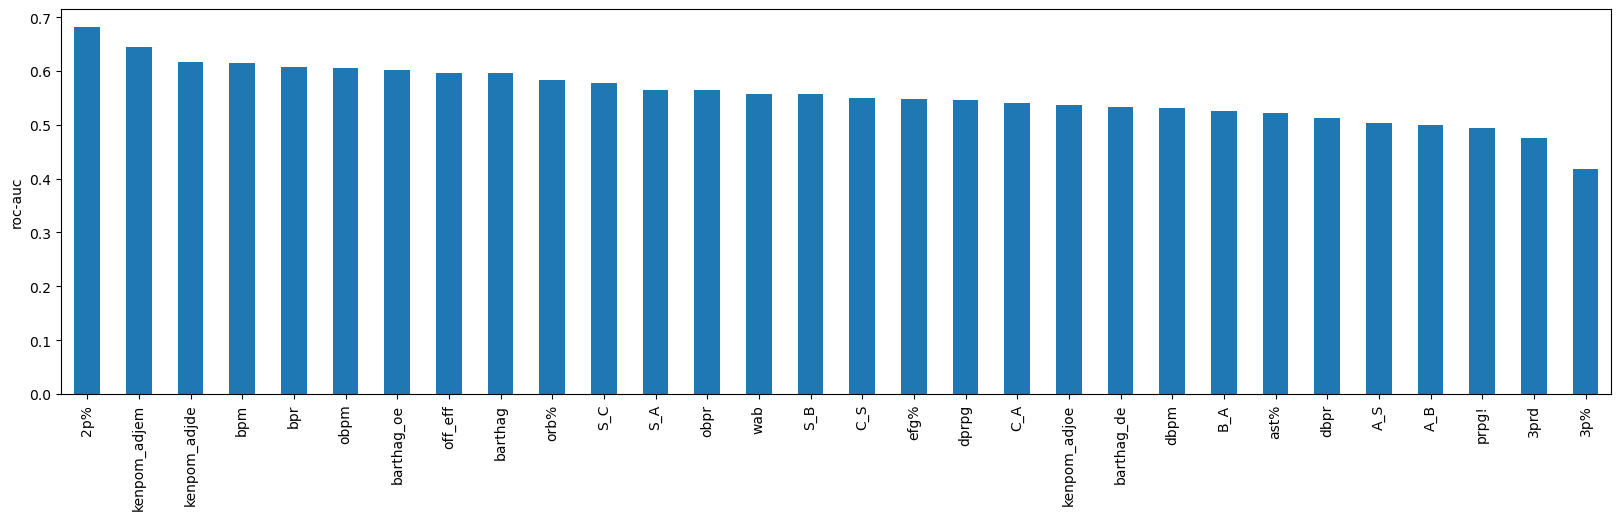

In [109]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [110]:
len(roc_values[roc_values > 0.5])

26

In [111]:
len(roc_values[roc_values > 0.6])

7

In [112]:
roc_values[roc_values > 0.55]

wab            0.5568
bpm            0.6142
obpm           0.6051
bpr            0.6080
obpr           0.5648
kenpom_adjem   0.6443
kenpom_adjde   0.6159
barthag        0.5966
barthag_oe     0.6023
off_eff        0.5966
orb%           0.5832
2p%            0.6810
S_A            0.5648
S_B            0.5568
S_C            0.5784
dtype: float64

In [113]:
roc_values[roc_values > 0.6]

bpm            0.6142
obpm           0.6051
bpr            0.6080
kenpom_adjem   0.6443
kenpom_adjde   0.6159
barthag_oe     0.6023
2p%            0.6810
dtype: float64

### IV. Exhaustive Feature Selection

In [114]:
X_train_scaled2 = X_train_scaled[[
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'kenpom_adjem',
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'off_eff', 
    'orb%', 
    '2p%', 
    '3p%', 
    'ast%', 
    '3prd', 
    'S_A',
    'S_B',
    'S_C',
    'A_S',
    'C_A']]

X_test_scaled2 = X_test_scaled[[
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'kenpom_adjem',
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'off_eff', 
    'orb%', 
    '2p%', 
    '3p%', 
    'ast%', 
    '3prd', 
    'S_A',
    'S_B',
    'S_C',
    'A_S',
    'C_A']]

In [115]:
# Initialize variables to track the best model
log_reg = LogisticRegression(solver='liblinear')
best_acc = 0
best_features = []
best_train_acc = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_acc = accuracy_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_acc > best_acc:
            best_acc = test_acc
            best_features = subset
            best_train_acc = train_acc

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test Accuracy Score: {best_acc:.4f}")
print(f"Training Accuracy Score of Best Model: {best_train_acc:.4f}")

Best Feature Subset: ('prpg!', 'dbpm', 'ast%', 'S_A')
Best Test Accuracy Score: 0.7857
Training Accuracy Score of Best Model: 0.6872


### IV. XG Boost

In [116]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Set up hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.006, 0.007, 0.008],
    'n_estimators': [700, 800, 900, 1000],
    'subsample': [0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.4],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=5, verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_scaled2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits
Best Hyperparameters: {'colsample_bytree': 0.2, 'gamma': 0.1, 'learning_rate': 0.006, 'max_depth': 2, 'n_estimators': 800, 'subsample': 0.1}


In [117]:
# Retrain the model with the best parameters
best_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    **best_params
)

best_xgb_model.fit(X_train_scaled2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.006, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [118]:
# Predict probabilities
y_pred_proba = best_xgb_model.predict_proba(X_test_scaled2)[:, 1]

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss on test set: {logloss}")

Log Loss on test set: 0.5970273150319952


In [119]:
# Predictions
y_train_pred = best_xgb_model.predict(X_train_scaled2)
y_test_pred = best_xgb_model.predict(X_test_scaled2)

# Calculate accuracy scores
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy Score on Training Data: {acc_train:.2f}")
print(f"Accuracy Score on Test Data: {acc_test:.2f}")

Accuracy Score on Training Data: 0.77
Accuracy Score on Test Data: 0.69
